<a href="https://colab.research.google.com/github/rump1ne/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as ny
from sklearn.preprocessing import OneHotEncoder

from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
test = pd.read_csv('/content/test.csv')
ds = pd.read_csv('/content/train.csv')


In [ ]:
ds.shape

(891, 12)

In [ ]:
ds.isnull().mean() * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
ds = ds.drop(columns=['Cabin'])
ds = ds.drop(columns=['Name'])
ds = ds.drop(columns=['PassengerId'])
ds = ds.drop(columns=['Ticket'])



In [ ]:
ds['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)



<ipython-input-6-5ec32f23c5ae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['Sex'].replace(['male', 'female'],
<ipython-input-6-5ec32f23c5ae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['Sex'].replace(['male', 'female'],


In [ ]:
ds = pd.get_dummies(ds, columns = ['Embarked'])

<Axes: >

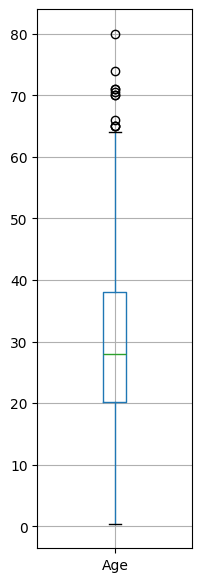

In [ ]:
df = ds.boxplot(column=['Age'], figsize=(2, 7))
df

In [ ]:
ds.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(ds.corr())


            Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass     -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex         0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age        -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp      -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch       0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare        0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked_C  0.168240 -0.243292  0.082853  0.036261 -0.059528 -0.011069   
Embarked_Q  0.003650  0.221009  0.074115 -0.022405 -0.026354 -0.081228   
Embarked_S -0.155660  0.081720 -0.125722 -0.032523  0.070941  0.063036   

                Fare  Embarked_C  Embarked_Q  Embarked_S  
Survived    0.257307    0.168240    0.003650   -0.155660  
Pclass     -0.549500   -0.243292    0.221009    0.081720  
Sex     

In [ ]:
ds.groupby(by='Pclass').mean()

ds['Age'].fillna(ds['Age'].mean(), inplace=True)
ds

<ipython-input-11-f89538ffba96>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['Age'].fillna(ds['Age'].mean(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,False,True
1,1,1,1,38.000000,1,0,71.2833,True,False,False
2,1,3,1,26.000000,0,0,7.9250,False,False,True
3,1,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,0,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,False,True
887,1,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,1,29.699118,1,2,23.4500,False,False,True
889,1,1,0,26.000000,0,0,30.0000,True,False,False


In [ ]:
ds = ds.dropna()
x = ds.drop(columns=['Age','Embarked_C','Embarked_Q','Embarked_S',])
y = ds['Age']
lreg = LinearRegression().fit(x,y)
lreg.score(x,y) # детерминация линейной регрессии возраста


0.19702420335088922

In [ ]:
model = OLS(y, x)
res = model.fit()
print(res.summary())


                                 OLS Regression Results                                
Dep. Variable:                    Age   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              443.6
Date:                Sat, 19 Apr 2025   Prob (F-statistic):                   9.19e-263
Time:                        03:59:15   Log-Likelihood:                         -3745.3
No. Observations:                 891   AIC:                                      7503.
Df Residuals:                     885   BIC:                                      7531.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,False,True
1,1,1,1,38.000000,1,0,71.2833,True,False,False
2,1,3,1,26.000000,0,0,7.9250,False,False,True
3,1,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,0,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,False,True
887,1,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,1,29.699118,1,2,23.4500,False,False,True
889,1,1,0,26.000000,0,0,30.0000,True,False,False


In [ ]:
X = ds.drop(['Survived'], axis=1)  # Убираем ненужные признаки
Y = ds['Survived']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,False,True
1,1,1,1,38.000000,1,0,71.2833,True,False,False
2,1,3,1,26.000000,0,0,7.9250,False,False,True
3,1,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,0,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,False,True
887,1,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,1,29.699118,1,2,23.4500,False,False,True
889,1,1,0,26.000000,0,0,30.0000,True,False,False


In [ ]:
log_reg_survival = LogisticRegression()
log_reg_survival.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_embarked = KNeighborsClassifier()
knn_embarked.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
survival_predictions = log_reg_survival.predict(X_test)
survival_accuracy = accuracy_score(Y_test, survival_predictions)

In [ ]:
embarked_predictions = knn_embarked.predict(X_test)
print("Точность логистической регрессии выживания:", survival_accuracy)
embarked_accuracy = accuracy_score(Y_test, embarked_predictions)
print("Точность модели kNN эмбаркации:", embarked_accuracy)

Точность логистической регрессии выживания: 0.8100558659217877
Точность модели kNN эмбаркации: 0.6983240223463687
